In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("../data/heart_disease_cleaned.csv")

In [23]:
X = df.drop("target", axis=1)
y = df["target"]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [26]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [ ]:
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components (95% variance): {optimal_components}")

Optimal number of components (95% variance): 12


In [28]:
pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]

In [29]:
df_pca = pd.DataFrame(X_pca, columns=pca_cols)
df_pca['target'] = y

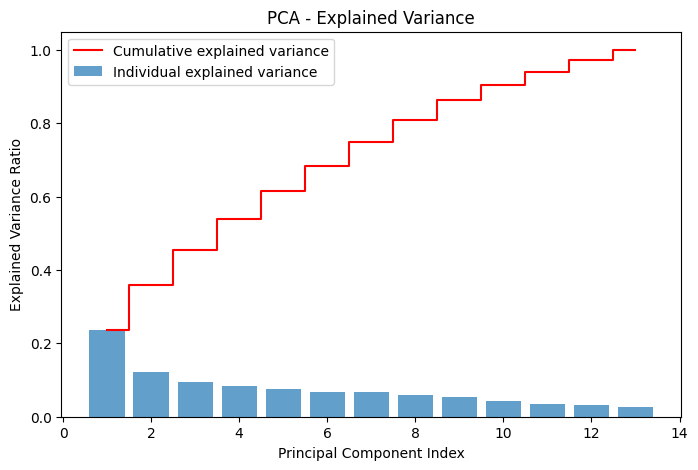

In [30]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, align='center',
        label="Individual explained variance")
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where="mid",
         label="Cumulative explained variance", color="red")
plt.xlabel("Principal Component Index")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA - Explained Variance")
plt.legend(loc="best")
plt.show()

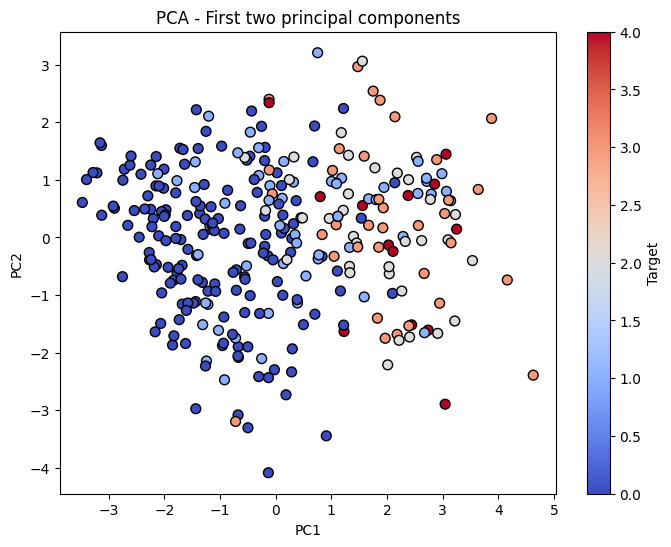

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", edgecolor="k", s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First two principal components")
plt.colorbar(label="Target")
plt.show()

In [32]:
print("✅ PCA completed")
print("Explained Variance Ratio:", explained_variance)

✅ PCA completed
Explained Variance Ratio: [0.23687279 0.12307138 0.09531354 0.08434038 0.07583033 0.06793044
 0.06651688 0.059837   0.0528847  0.04334829 0.03526033 0.03157598
 0.02721797]


In [33]:
cumulative = np.cumsum(pca.explained_variance_ratio_)
optimal = np.argmax(cumulative >= 0.90) + 1
print(optimal)

10


In [34]:
pca_opt = PCA(n_components=optimal)
X_pca_opt = pca_opt.fit_transform(X_scaled)

In [35]:
pca_cols = [f"PC{i+1}" for i in range(optimal)]
df_pca = pd.DataFrame(X_pca_opt, columns=pca_cols)
df_pca["target"] = y

In [ ]:
df_pca.to_csv('../data/heart_disease_pca_transformed.csv', index=False)
print("✅ PCA-transformed dataset saved as 'heart_disease_pca_transformed.csv'")

OSError: Cannot save file into a non-existent directory: 'data'